In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/ML/ProjetML/src
from mltools import *
from loss import *
from module import *
from encapsulage import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/ML/ProjetML/src


# Sequentiel

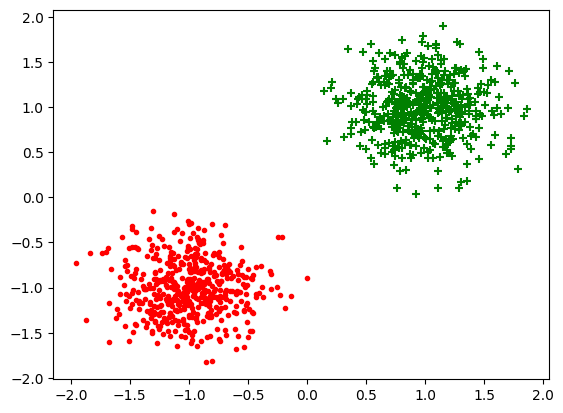

In [2]:
np.random.seed(0)
X, Y = gen_arti()
Y = np.where(Y==-1,0,1)
plot_data(X,Y)

Acc: 0.638


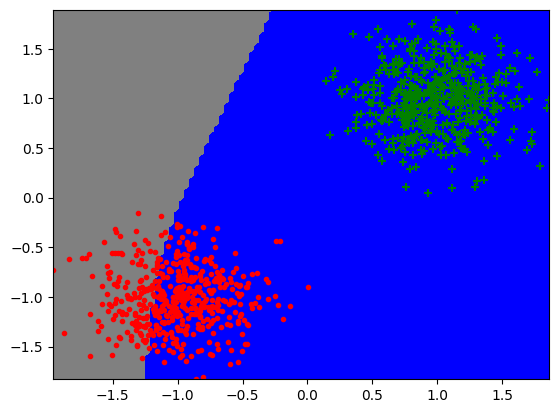

In [3]:
np.random.seed(1) # changer le seed pour voir de differentes res
#ini
MLin1 = Linear(X.shape[1],2)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 1) #w_h1(out,in)
MSig = Sigmoide()
#ini seq
net = Sequentiel(MLin1, MtanH, MLin2, MSig)
#forward
z = net.forward(X)
#decision
y_pred = np.where(z>0.5,1,0)

net_copy = cp.deepcopy(net) # afin de ne pas modifier notre network

#plot
plot_frontiere(X,lambda x : f_sig_seq(net_copy, x),step=100)
plot_data(X,Y)
res = np.where(y_pred == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Iter 1, Accuracy: 0.66
Iter 2, Accuracy: 0.681
Iter 3, Accuracy: 0.703
Iter 4, Accuracy: 0.718
Iter 5, Accuracy: 0.75
Iter 6, Accuracy: 0.778
Iter 7, Accuracy: 0.802
Iter 8, Accuracy: 0.82
Iter 9, Accuracy: 0.832
Iter 10, Accuracy: 0.844


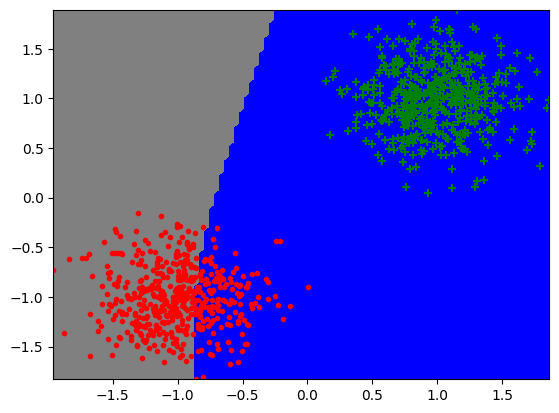

In [4]:
nbiter = 10
for i in range(nbiter):
  #Back propagation
  net.backward(MSELoss(), Y,gradient_step=1e-4)


  #forward
  z = net.forward(X)
  #decision
  y_pred = np.where(z>0.5,1,0)

  net_copy = cp.deepcopy(net)

  #plot
  plot_frontiere(X,lambda x : f_sig_seq(net_copy, x),step=100)
  plot_data(X,Y)
  res = np.where(y_pred == Y, 1, 0).sum()
  print(f"Iter {i+1}, Accuracy:",res/len(Y))

# Optim

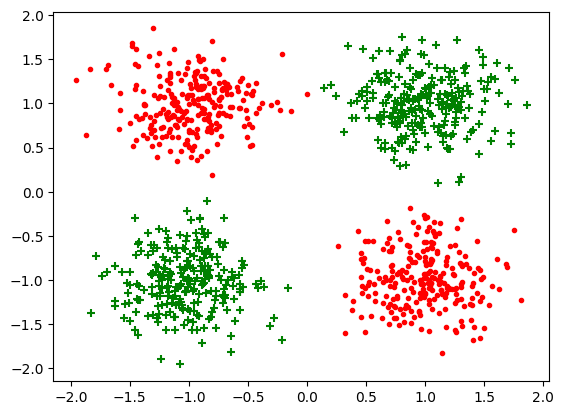

In [5]:
np.random.seed(0)
X, Y = gen_arti(data_type=1)
Y = np.where(Y==-1,0,1)
plot_data(X,Y)

In [6]:
np.random.seed(6)
#ini
nb_couche_latentes = 30
MLin1 = Linear(X.shape[1],nb_couche_latentes)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 1) #w_h1(out,in)
MSig = Sigmoide()
#ini seq
net = Sequentiel(MLin1, MtanH, MLin2, MSig)
# Optim
eps = 1e-4
Opt = Optim(net, MSELoss(), eps)
y_hat, _ = Opt.step(X,Y)

#decision
y_pred = np.where(y_hat>0.5,1,0)

res = np.where(y_pred == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Acc: 0.726


Iter 1, Accuracy: 0.767
Iter 2, Accuracy: 0.799
Iter 3, Accuracy: 0.829
Iter 4, Accuracy: 0.866
Iter 5, Accuracy: 0.902
Iter 6, Accuracy: 0.929
Iter 7, Accuracy: 0.956
Iter 8, Accuracy: 0.965
Iter 9, Accuracy: 0.977
Iter 10, Accuracy: 0.982


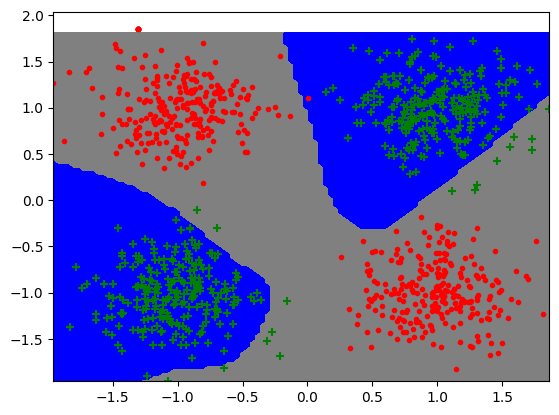

In [7]:
Opt = Optim(net, MSELoss(), eps)
nbiter = 10
for i in range(nbiter):
  y_hat, _ = Opt.step(X,Y)

  #decision
  y_pred = np.where(y_hat>0.5,1,0)

  net_copy = cp.deepcopy(net)

  #plot
  plot_frontiere(X,lambda x : f_sig_seq(net_copy, x),step=100)
  plot_data(X,Y)
  res = np.where(y_pred == Y, 1, 0).sum()
  print(f"Iter {i+1}, Accuracy:",res/len(Y))

# SGD

<ipython-input-8-b4d8790a7885>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([np.array([x,y]).tolist() for x, y in zip(X,Y)]) #merge x et y en un jeu de données


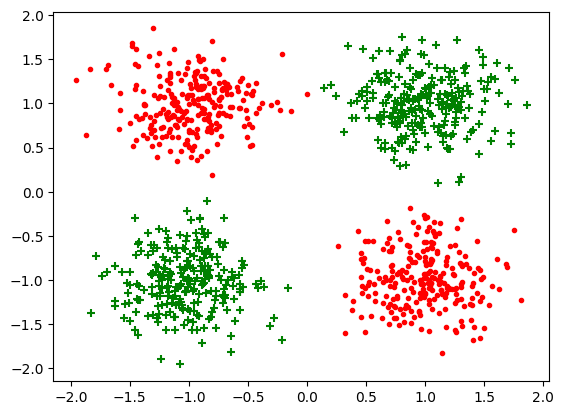

In [8]:
np.random.seed(0)
X, Y = gen_arti(data_type=1)
Y = np.where(Y==-1,0,1)
data = np.array([np.array([x,y]).tolist() for x, y in zip(X,Y)]) #merge x et y en un jeu de données
plot_data(X,Y)

100%|██████████| 100/100 [00:02<00:00, 34.58it/s]


Acc: 0.993


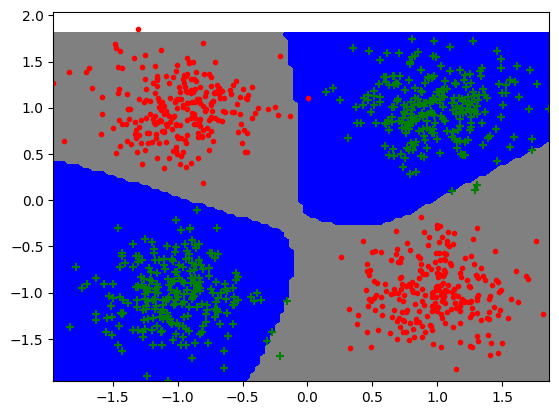

In [9]:
np.random.seed(6)
#ini
nb_couche_latentes = 30
MLin1 = Linear(X.shape[1],nb_couche_latentes)
MtanH = TanH()
MLin2 = Linear(MLin1._parameters['w'].shape[0], 1) #w_h1(out,in)
MSig = Sigmoide()
#ini seq
net = Sequentiel(MLin1, MtanH, MLin2, MSig)
#ini SGD
nb_epoch = 100
l,s = SGD(net, data, MSELoss(), eps=1e-4, batch_taille=100, nb_iter=nb_epoch)

y_hat = net.forward(X)
#decision
y_pred = np.where(y_hat>0.5,1,0)

net_copy = cp.deepcopy(net) # afin de ne pas modifier notre network

#plot
plot_frontiere(X,lambda x : f_sig_seq(net_copy, x),step=100)
plot_data(X,Y)
res = np.where(y_pred == Y, 1, 0).sum()
print("Acc:",res/len(Y))

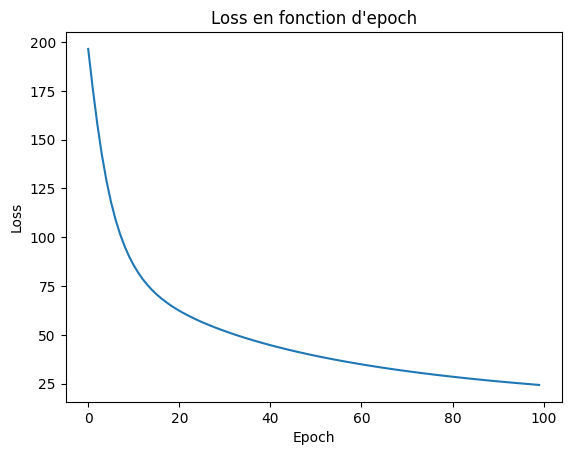

In [10]:
plt.plot(np.arange(nb_epoch),l)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss en fonction d'epoch")
plt.show()

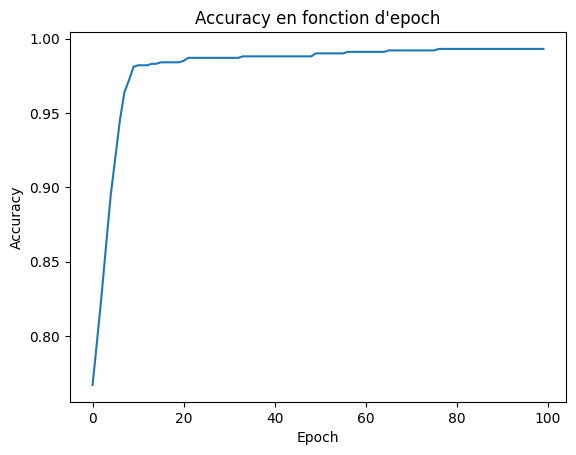

In [11]:
plt.plot(np.arange(nb_epoch),s)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction d'epoch")
plt.show()